# Final Project 

**Submitted by -**: Mahlet Melese

## Introduction

#### The project's domain background:
The finance sector is a fascinating field to explore the power of machine learning and its application is well researched and documented. In particular, this field is often associated with high monetary compensations which is attractive to many of us to try our hands on applying the knowledge of mathematical and statistical models, and to mine patterns in stock movements so that we can make predictions and have a competitive edge over other traders. Today, there are many trade brokers taking advantage of high-frequency financial data and electronic trading tools that are built on the foundations of machine learning. These high-frequency traders are often characterised by high speed, high turn-over rates and high order-to-trade ratios and are slowly replacing the traditional traders (Aldridge I., 2013). And indicators of buy and sell opportunities are often built on only information of historical price and volume, rather than traditional valuation of a company. Since my current knowledge does not allow myself to carry out meaningful analysis of a company’s value and subsequently perform valuation of its stock, it was found that this particular method of stock price prediction to be a highly suitable area to study. The data was collected from “Yahoo! Finance”. Datasets of historical data of S&Pstock index price from “Yahoo! Finance” typically has the following structure: Date, Open, High, Low, Close, AdjClose, Volume,Dividends and Stock Splits. However, upon inspection the volume feature was found to be loosely recorded which made this feature particularly unreliable and impractical for analysis.The S&P500 is a stock market index that measures the stock performance of 500 large companies listed on stock exchange in the United States. I will Create Machine learning model to predict tomorrow's S&P500 price index given historical data and also backtested this model on twenty plus years of historical data.So, we can really be confident in the prediction that it is making. I have sourced data from 1927 to present which would provide this project a large enough timeframe in order for meaningful analysis to take place.


#### Data Sources:

The first step is import the yfinance package, this package calls the the yfinance API to download daily stocks index price.Second, we need to initialize the ticker class which enable us to download price history for a single simbol, in this project I will use the 'GSPC'symbol which is the S&P500 index.Then ,we will use history method and we pass in period equals maximum which query data from the very begining when the index was created and then give us pandas dataframe. In this dataframe each row is the price on a single trading day so,non trading days are not included in this data.The dataframe coulumns indicates the opening price when the market opend, the highest price during the day, the lowest price during the day, the close price when the exchage closed and the total volume traded that day. Essentially we are going to use this columns to predict if the stock price will go up or down tomorrow. We also have additional columns called Dividends and Stock Splits , we are not going to use this columns becouse this columns are more appropriate for individual stocks not for an index price.

#### Methodology 

The workflow of the project goes as follows: I will edit this

Extract and Clean the data from Yahoo Finance Feature Engineering with Dimensionality Reduction Train with Classification Algorithms Train with Optimized Classification Algorithms with GridSearch using TimeSeriesSplit for cross validation Train with XGBoost Classifier and Optimize with GridSearch using TimeSeriesSplit for cross validation Train with LightGBM Classifier and Optimize with GridSearch using TimeSeriesSplit for cross validation

## Data Preparation & Exploratory Data Analysis (EDA):

### Import Libraries

In [5]:
#Import Dependencies
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import os
import tarfile

from pptx import Presentation 
from pptx.util import Inches
from pptx.util import Pt
import pptx
from pptx.enum.text import PP_ALIGN
from io import StringIO

#This ingores depreciation warnings, which will make the code more readable
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

#### Part 1.Downloading S&P500 price dataset

In [67]:
# Fetch historical data for S&P 500 from Yahoo Finance
sp500=yf.Ticker("^GSPC")
sp500= sp500.history(period="max")

#fig.savefig('u7.png') # saving image so we can use in ppt

# Display the Dataset 
sp500.head(10)





,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-09 00:00:00-05:00,17.500000,17.500000,17.500000,17.500000,0,0.0,0.0
1928-01-10 00:00:00-05:00,17.370001,17.370001,17.370001,17.370001,0,0.0,0.0
1928-01-11 00:00:00-05:00,17.350000,17.350000,17.350000,17.350000,0,0.0,0.0
1928-01-12 00:00:00-05:00,17.469999,17.469999,17.469999,17.469999,0,0.0,0.0


This is the first 10 rows of the dataset using the head method.Here, we can have a first look at the features and some of the values that each one takes.

#### Description for 7 Attribute 
| Columns| Description |
|:------:|-|
| INDEX |  Unique ID | 
| Date | The date of the record | 
| Open | The opening price of the day (when trading starts| 
|High| The highest trade price during the day|
|Low| The lowest trade price during the day|
|Close|The closing price for the day (when trading is finished)|
|Volume| The number of shares traded|

 **Check the dataset shape**

Knowing the amount of data we have is very important, because the quality of our analysis is depend on that.

In [3]:
# check the result
sp500.shape

(24012, 7)

#### Check the datetime index

The index column enable us to index and slice the dataframe easly.

In [63]:
# check the s&p500 index
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-07-24 00:00:00-04:00', '2023-07-25 00:00:00-04:00',
               '2023-07-26 00:00:00-04:00', '2023-07-27 00:00:00-04:00',
               '2023-07-28 00:00:00-04:00', '2023-07-31 00:00:00-04:00',
               '2023-08-01 00:00:00-04:00', '2023-08-02 00:00:00-04:00',
               '2023-08-03 00:00:00-04:00', '2023-08-04 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24013, freq=None)

 **Check data type of all columns**

Pandas .info method helps us to display the data types of all columns as a series.

In [6]:
# Check the data types
sp500.info() 


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24012 entries, 1927-12-30 00:00:00-05:00 to 2023-08-03 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          24012 non-null  float64
 1   High          24012 non-null  float64
 2   Low           24012 non-null  float64
 3   Close         24012 non-null  float64
 4   Volume        24012 non-null  int64  
 5   Dividends     24012 non-null  float64
 6   Stock Splits  24012 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.5 MB


####  Let's check if there is a missing value
I checked null values which is a fundamental part of data cleaning.

In [7]:
# recommended code 
sp500.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Sanity check, that there are indeed no null values in the dataset

#### Check duplicate value in dataframe

In [64]:
# use duplicated function
sp500_dup = sp500.duplicated()

# check the result
sp500_dup.value_counts()

False    20157
True      3856
Name: count, dtype: int64

In [ ]:
#### plot the closing price aginst the index


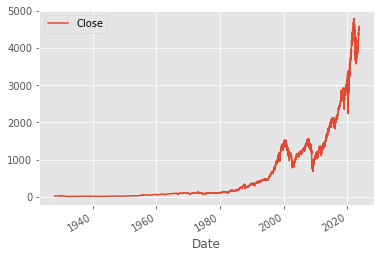

In [65]:
# plot closing price vs index

sp500.plot.line(y="Close",use_index=True)
fig.savefig('w5.png')


This plot shows price history of S&P500 index. Based on this plot we really can regret not buying the index fund anypoint in the last few years.

### Dataset preparation

There is a lot of historical data in this dataframe and usually a lot of historical data is great but with stock market data,if we go back too far the market could shift fundamentally and some of that old data might not be useful and making future prediction.So, I will remove all data came before 1990.And I will remove Dividends and Stock Splits colums from the dataframe

In [68]:
# remove extra columns
del sp500["Dividends"]
del sp500["Stock Splits"]

In [70]:
# remove data before 1990
# use panda's loc method
# only takes rows where the index is at least 1990-01-01
df = sp500.loc["1990-01-01":].copy()

In [71]:
# create column called tomorrow
# the column going to be tomorrow's price
# use panda's shift method
# use the close column and shift all the price back one day

df["Tomorrow"] = df["Close"].shift(-1)

# show the dataframe
df

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995
...,...,...,...,...,...,...
2023-07-31 00:00:00-04:00,4584.819824,4594.220215,4573.140137,4588.959961,4503600000,4576.729980
2023-08-01 00:00:00-04:00,4578.830078,4584.620117,4567.529785,4576.729980,4042370000,4513.390137
2023-08-02 00:00:00-04:00,4550.930176,4550.930176,4505.750000,4513.390137,4270710000,4501.890137


#### Setting up the target for machine learning

This target going to be where the price go up or down tomorrow. Some peolple like to predict the absolute price, but the big problem with that is our model can be extremly accurate. we might be very good in predicting the absolute price but we can still lose money becouse ultimatly if we are buying and selling stocks , we don't care getting acurate on the absolute price , we care more on  getting acurate on the directionallity i.e if the price go up or down. So, what am trying to do is let say on days the stock goes up ,can we actully pridict it would go up? in that way if we want to buy the stock we know we can buy it and the price will go up so our target going to be will the stock up or down.

In [72]:
# set up the target, this is what we are trying to predict using machine learning
# based on tomorrow's price set up the target price
# the target: is tomorrow's price grater than tody's price

df["Target"] = (df["Tomorrow"] > df["Close"]).astype(int)

# fig.savefig('x6.png')

# show the dataframe
df

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-07-31 00:00:00-04:00,4584.819824,4594.220215,4573.140137,4588.959961,4503600000,4576.729980,0
2023-08-01 00:00:00-04:00,4578.830078,4584.620117,4567.529785,4576.729980,4042370000,4513.390137,0
2023-08-02 00:00:00-04:00,4550.930176,4550.930176,4505.750000,4513.390137,4270710000,4501.890137,0


#### Check duplicates after data preparation

In [73]:
# use duplicated function
sp500_dup = df.duplicated()

# check the result
sp500_dup.value_counts()

False    8463
Name: count, dtype: int64

In [74]:
# Brief Description of our dataset
# fig.savefig('y2.png')

df.describe()



,Open,High,Low,Close,Volume,Tomorrow,Target
count,8463.000000,8463.000000,8463.000000,8463.000000,8.463000e+03,8462.000000,8463.000000
mean,1549.033337,1558.269237,1539.167950,1549.352714,2.442614e+09,1549.493303,0.534326
std,1049.055955,1054.842049,1042.891916,1049.206437,1.852540e+09,1049.188716,0.498850
min,295.450012,301.450012,294.510010,295.459991,1.499000e+07,295.459991,0.000000
25%,889.734985,898.895020,878.924988,889.984985,6.259850e+08,890.177475,0.000000
50%,1261.890015,1269.880005,1254.180054,1261.890015,2.420510e+09,1261.940002,1.000000
75%,2009.674988,2020.659973,1995.224976,2010.835022,3.823775e+09,2011.052521,1.000000
max,4804.509766,4818.620117,4780.040039,4796.560059,1.145623e+10,4796.560059,1.000000


#### Distribution of the dataset using histogram

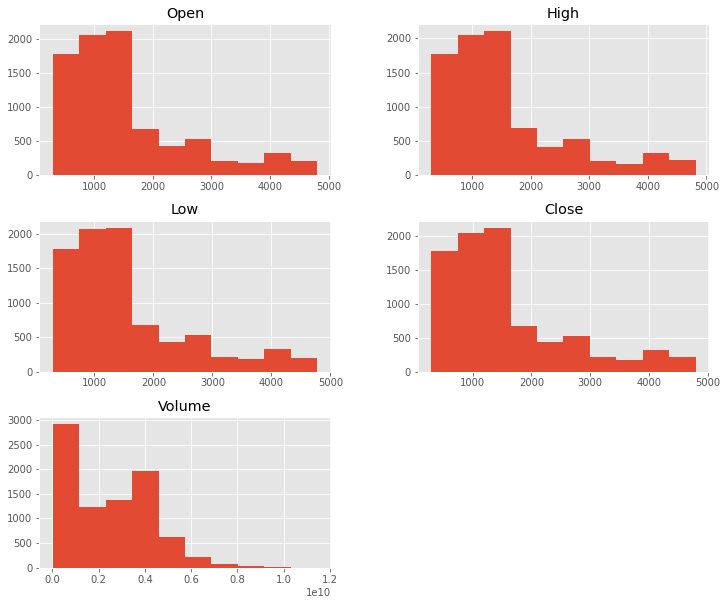

In [76]:
# plot histogram
selected_columns = ['Open','High','Low','Close','Volume']
selected_data = df[selected_columns]
selected_data.hist(figsize=(12,10));
fig.savefig('j+.png', bbox_inches='tight') # saving image so we can use in ppt

Based on the distribution plot,we need to scale all the numerical values in dataset, before modeling.

#### Boxplot:

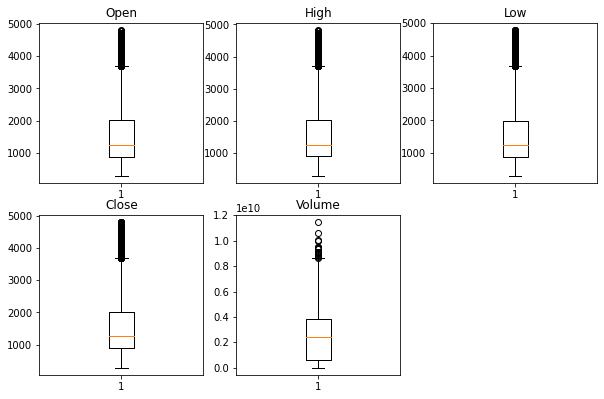

In [18]:
num_column = ['Open', 'High', 'Low', 'Close', 'Volume']

# set figure size
fig = plt.figure(figsize=(10, 10))
i = 1
for f in num_column :
    plt.subplot(3, 3, i)
    plt.boxplot(df[f], whis=1.5) # Increase the size of the box using 'whis' parameter
    plt.title(f)
    i += 1
#fig.savefig('i1.png') # saving image so we can use in ppt
plt.show()

Volume column has many that we will need to scale later before model training.

####  Let's look at each column individually

##### Open:

<Axes: xlabel='Open'>

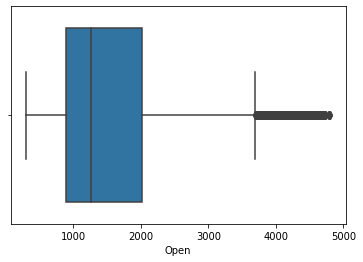

In [19]:
sns.boxplot(df.Open)
#fig.savefig('m1.png') # saving image so we can use in ppt

<Axes: xlabel='High'>

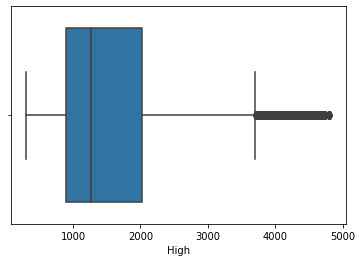

In [20]:
sns.boxplot(df.High)
#fig.savefig('b1.png') # saving image so we can use in ppt

<Axes: xlabel='Low'>

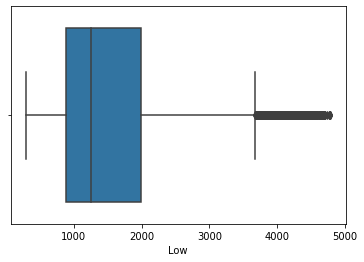

In [21]:
sns.boxplot(df.Low)
#fig.savefig('s1.png') # saving image so we can use in ppt

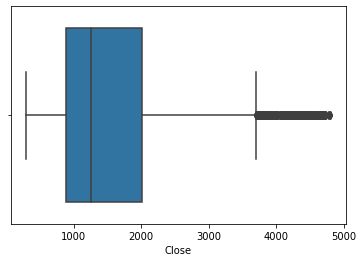

In [23]:
sns.boxplot(df.Close)
fig.savefig('k1.png') # saving image so we can use in ppt

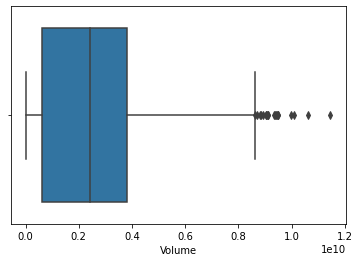

In [24]:
sns.boxplot(df.Volume)
fig.savefig('v1.png') # saving image so we can use in ppt

Volume column shows that there are outliers, and we will need to scale this later in our data preparation before modeling. 

Overview: There are some columns that needs to be scaled, but there are some columns in our dataset that we dont need for modeling work. For instance, we have "Open","Low","High" , and "Close" columns that we don't for our modeling. We can just keep "Adj Close" column for our modeling.

<ipython-input-77-5ab16d79d5dc>:8: UserWarning: 'set_params()' not defined for locator of type <class 'pandas.plotting._matplotlib.converter.PandasAutoDateLocator'>
  plt.locator_params(axis='x', nbins=10)  # Adjust the number of bins to control x-axis tick frequency


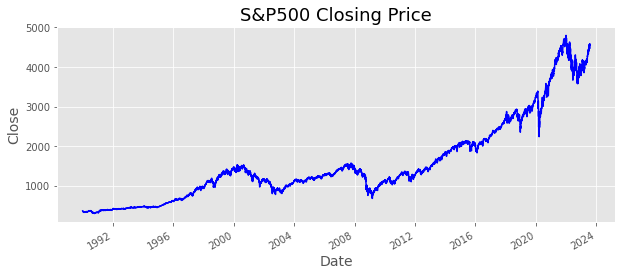

In [77]:
# Plotting close data
plt.style.use('ggplot')
plt.figure(figsize=(10, 4))
plt.grid(True)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close', fontsize=14)
df['Close'].plot(color='blue')
plt.locator_params(axis='x', nbins=10)  # Adjust the number of bins to control x-axis tick frequency
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('S&P500 Closing Price', fontsize=18)
fig.savefig('i9.png')
plt.show()

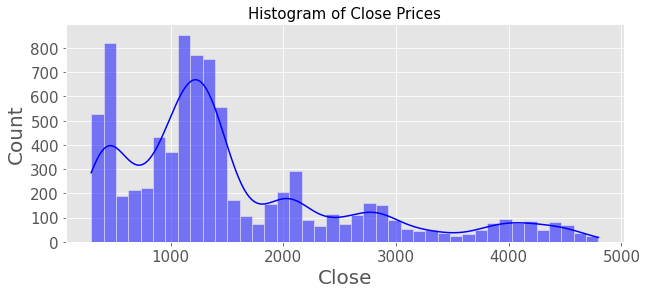

In [78]:
plt.figure(figsize=(10, 4)) 
sns.histplot(df['Close'], kde=True, color='blue')
plt.xlabel('Close', fontsize=20)
plt.xticks(fontsize = 15)
plt.ylabel('Count', fontsize=20)
plt.yticks(fontsize  = 15)
plt.title('Histogram of Close Prices', fontsize=15)
fig.savefig('e8.png')
plt.show()

The histogram plot shows the distribution of the 'Open' prices, where the x-axis represents the 'Open' price range and the y-axis represents the frequency (count) of occurrences within each price range. This plot provides a smooth estimate of the probability density function for the 'Open' prices.And can help us understand the central tendency, spread, and potential outliers in the 'Open' prices distribution.

## Training an initial machine learning model
Now the dataset is ready so let's start train the first machine learning model.For initial model am going to use RandomForestClassifier.I love to use RandomForestClassifier as my defult model for most machine earning for a few reasons, 1. it work by training abunch of individual decision trees with randomized parameters and then averaging the results from those decision trees so, because of this process it is resistent to overfiting, they can overfit but it is harder for them to overfit than it is for others models to overfit. They also run relatively quickly and they can pick up non linear tendency in the data.
for example the open price is not linearly corelated with target so RandomForest pick up non-linear relationships which in stock price prediction most of the relationships are non-linear.

In [79]:
# now initalize the model
# use n_estimators: the number of decision trees we want to train, the higher the number the better the accuracy
# min_samples_split :help us protect against over-fitting
# set random_state:if we run the same model twice, the random numbers generated will be in a predictble sequence

model= RandomForestClassifier(n_estimators = 100,min_samples_split=100,random_state =1)

In [80]:
# Split the data into train and test sets
# use all of the row's except the last 100 rows
# and use the last 100 row's in the test set

train=df.iloc[:-100]
test = df.iloc[-100:]

# Define the predictor columns and target column
predictors = ["Close","Volume","Open","High","Low"]
target = "Target" 

In [81]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the training data
train_scaled = scaler.fit_transform(train[predictors])

# Transform the test data using the scaler fitted on training data
test_scaled = scaler.transform(test[predictors])

In [82]:
# let's train the model using the predictor column inorder to predict the target
# use mode.fit method
model.fit(train[predictors],train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

#### Let's measure how accurate the model is 

This is really important pice of machine learning, we need to measure if our model is doing what we think it is or not.All the precision score is , when we said the market would go up(i.e the target is 1) did it actually go up so what percentage of the time when we said the market would go up,did actually go up.This is really good error metric or accuracy metric for this particular case bacuse am going to assume in this case we want to buy stock and when we buy stock we want to hold that stock and sell it. And we want to make sure when we buy stock, the sock price is going to increase.Based on our goal we can adjust what error metrics is using to measure performance.In this project I will use precision score.

In [83]:
# generate prediction using the model with predict method
preds=model.predict(test[predictors])

In [84]:
# use pandas series
preds=pd.Series(preds,index=test.index)

In [85]:
# calculate prediction using the actuall target and the predicted target
precision_score(test["Target"],preds)

0.5357142857142857

When we said the stock price go up, it only went up 62% of the time.

<Axes: xlabel='Date'>

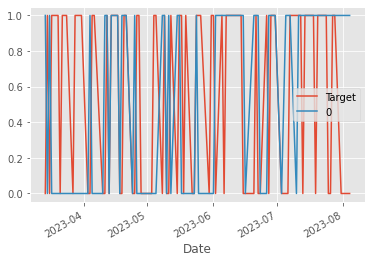

In [86]:
#plot predictions
#use pandas concat
# treat each of this inputs as a column in our dataset

combined= pd.concat([test["Target"],preds],axis=1)
combined.plot()

This graph indicates that we mostly predicted the market would go up and mostly it seems going down.That explains why the predection were so far.

#### Building a back testing system
The next step is build a more robost way to test the algorism.It help us to accuratly measure the error over long period of time.Currently, I was only able to test aginst the last 100 day's but if we really build a stock price model and we want to use it in a real world, we want to  able to test across multiple year's of data and we want to know how the algorism handle a lot of different situation that gives us more confident to work in the future.Based on  the backtest, I will use the first 10 year's of data and then predict values for the eleventh year. Then we will take the first eleveth year of data and predict values for the twelveth year of data so on. In this way we will actually get predictions for a lot of different years and be able to have more confidence in our model.After the backtest, I will actually start evaluating the errors of my prediction.

In [87]:
# create a prediction function

def predict(train,test,predictors,model):
    model.fit(train[predictors],train["Target"])
    preds=model.predict(test[predictors])
    preds=pd.Series(preds,index=test.index,name="predictions")
    combined=pd.concat([test["Target"],preds],axis=1)
    return combined

#### Backtest to check how good our model is:

In [88]:
# create backtest function
# train the model with 10 year's of data
# we will be training a model for about a year then going to the next year
# each dataframe is a prediction for a single year
# loop the data year by year

def backtest(data,model,predictors,start=2500,step=250):
    all_predictions =[]
    
    for i in range(start,data.shape[0],step):
        train=data.iloc[0:i].copy()
        test=data.iloc[i:(i+step)].copy()
        predictions=predict(train,test,predictors,model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions) # concat all the predictions together

In [90]:
# start the backtest
predictions=backtest(df,model,predictors)  

In [91]:
# see how many day's we predicted the market go up vs down
# use value_count: count how many times each type of predictions was made

prediction_counts = predictions["predictions"].value_counts()

# Print the counts
print(prediction_counts)

predictions
0    3433
1    2530
Name: count, dtype: int64


We can see, we predicted the market go down about 3433 days and go up about 2530 days.

In [51]:
# now let's check the precision score
precision_score(predictions["Target"],predictions["predictions"])

0.5296442687747036

Across all of those rows, about six thousend traiding days,we were about 53% precise. When we say the market would go up, it went up 53% of the time.

In [93]:
# check the percentage of days where the market actually went up
# use value count of the target divided by the number of rows total
predictions["Target"].value_counts()/predictions.shape[0]

Target
1    0.533959
0    0.466041
Name: count, dtype: float64

So, the S&P500 in the days we were looking at actually went up 53.6% of days and went down 46.6% of days.

#### Adding additional predictors to the model
- Add more features to the model and see if that improves the accuracy. So, I am going to give different horizons to the algorism and look at the rolling means.And calculate the mean close price in the last 2 days, the last trading week,the last 60 days ,the last year and the last four years and we will find the ratio between todays closing price and the closing price in those periods.Even more days in the rolling period alone may benefit the learners significantly.

In [96]:
# create varity of rolling averages

horizons = [2,5,60,250,1000]
new_predictors =[]

for horizon in horizons: # loop through horizons
    rolling_averages = df.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    df[ratio_column]=df["Close"]/rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    df[trend_column]=df.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors +=[ratio_column,trend_column]

In [100]:
df.head(5)

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0


The dataframe has NaN values because when pandas can not find enough days or rows prior to the current row, it actually compute the rolling average and return NaN.

In [99]:
# remove the missing values in the dataframe
df= df.dropna()
df.head(5)

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0


#### Improving the model

In [101]:
# update the model slightly and change some of the parameters
model=RandomForestClassifier(n_estimators=200,min_samples_split=50,random_state=1)

In [102]:
# rewrite the predict function slightly
def predict(train,test,predictors,model):
    model.fit(train[predictors],train["Target"])
    preds=model.predict_proba(test[predictors]) [:,1]
    preds[preds >=.6] = 1 # this will reduce the number of trading days
    preds[preds < .6]= 0
    preds=pd.Series(preds,index=test.index,name="predictions")
    combined=pd.concat([test["Target"],preds],axis=1)
    return combined

In [103]:
# run the backtest again
predictions=backtest(df,model,new_predictors)

In [104]:
# check the value count again
predictions["predictions"].value_counts()

predictions
0.0    4144
1.0     818
Name: count, dtype: int64

There were about four thousend days where it pridicted the price went down. The distribution is very different now, we can see that only a few days we predict that the price would go up that is because I change the trashhold, I ask the model to be more confident in its prediction before it actually predicted and the price go up.Which means we are actully be trading or buying stock in fewer days.

In [105]:
precision_score(predictions["Target"],predictions["predictions"])

0.5684596577017115

## Summary and next steps with the model
We can see that, when we buy a stock the model pridict the price go up and,57% of the time it will actually go up.It is actually pretty good specially given I just looking at timeserious data and just looking at historical prices of the index.
I would like to point out that neural networks were not considered for this project due to the computational demands of the algorithms. In particular, I felt that recurrent neural networks such as Long-Short Term Memory (LSTM) neural networks were the most appropriate for this project as these models were designed specifically for time-series data. Also, due to time constraints other methods of feature engineering were not explored, classic stock market indicators such as Bollinger Bands and Sharpe Ratios . To improve this model I would recommend to include exchanges that are open overnight.The S&P500 only trade during US market hours.There are other indices around the world open before the US market is open so, it might be worth looking those prices and see if we can actually correlate them, if index in the other side of the world increasing does that help predict the S&P500 better.This concludes the first stage of this project but the above mentioned room for improvements will be explored in the second stage of this project.

## Create powerpoint presentation using Python

In [64]:
path = "sample.pptx"
#Intitalizing PPt object 
prs = Presentation() 

# creating slide 1 
zero_slide = prs.slide_layouts[6]
slide0 = prs.slides.add_slide(zero_slide)
 
txBox = slide0.shapes.add_textbox( pptx.util.Inches(3.5), pptx.util.Inches(1),
                               width=pptx.util.Inches(4), height=pptx.util.Inches(1))
tf = txBox.text_frame
tf.clear()
p = tf.paragraphs[0]
run = p.add_run()
run.text = 'SP500 Data Analysis'
font = run.font
font.name = 'Calibri'
font.size = Pt(24)
font.bold = True
font.italic = None 
p.alignment = PP_ALIGN.CENTER


# creating slide 2 
blank_slide_layout = prs.slide_layouts[6] 
slide = prs.slides.add_slide(blank_slide_layout)
left = top = Inches(1)
pic = slide.shapes.add_picture('j+.png', pptx.util.Inches(0.25), pptx.util.Inches(1),
                               width=pptx.util.Inches(9), height=pptx.util.Inches(5))

# creating slide 3
second_slide = prs.slide_layouts[6]
slide2 = prs.slides.add_slide(second_slide)
 
pic = slide2.shapes.add_picture('x6.png', pptx.util.Inches(1.5), pptx.util.Inches(1),
                               width=pptx.util.Inches(7), height=pptx.util.Inches(2))

pic = slide2.shapes.add_picture('y2.png', pptx.util.Inches(0.5), pptx.util.Inches(3.5),
                               width=pptx.util.Inches(9), height=pptx.util.Inches(3))

# creating slide 3
third_slide = prs.slide_layouts[6]
slide3 = prs.slides.add_slide(third_slide)

pic = slide3.shapes.add_picture('j+.png', pptx.util.Inches(0.5), pptx.util.Inches(1),
                               width=pptx.util.Inches(9), height=pptx.util.Inches(6))

# creating slide 4
forth_slide = prs.slide_layouts[6]
slide4 = prs.slides.add_slide(forth_slide)

pic = slide4.shapes.add_picture('i1.png', pptx.util.Inches(0.5), pptx.util.Inches(1),
                               width=pptx.util.Inches(9), height=pptx.util.Inches(5))

# creating slide 5
fifth_slide = prs.slide_layouts[6]
slide5 = prs.slides.add_slide(fifth_slide)

pic = slide5.shapes.add_picture('i9.png', pptx.util.Inches(1), pptx.util.Inches(0.5),
                               width=pptx.util.Inches(4), height=pptx.util.Inches(2))
# creating slide 6
sixth_slide = prs.slide_layouts[6]
slide6 = prs.slides.add_slide(sixth_slide)
pic = slide6.shapes.add_picture('e8.png', pptx.util.Inches(0.5), pptx.util.Inches(3),
                               width=pptx.util.Inches(9), height=pptx.util.Inches(4))

#saving the created slide 
prs.save('S&P500 stock.pptx')

## Reference 
https://www.researchgate.net/figure/High-Frequency-Trading-Domain-source-Aldridge-2013_fig1_358123608
https://www.kaggle.com/code/samaxtech/predicting-s-p500-index-linearreg-randomforests  for linear regression and random forest
https://medium.com/@akashsangar2653/eda-and-price-prediction-of-s-p-500-stock-prices-dataset-290535b9a40b
https://medium.com/shiyan-boxer/s-p-500-stock-price-prediction-using-machine-learning-and-deep-learning-328b1839d1b6
https://www.kaggle.com/code/yash16jr/s-p500-data-eda-and-prediction-arima-sarimax
https://medium.com/shiyan-boxer/s-p-500-stock-price-prediction-using-machine-learning-and-deep-learning-328b1839d1b6
https://www.kaggle.com/datasets/miguelaenlle/massive-stock-news-analysis-db-for-nlpbacktests   for financial data
https://ai.plainenglish.io/using-deep-learning-to-predict-stock-prices-a-step-by-step-guide-with-python-and-the-s-p-500-59b06de25357
https://medium.com/codex/stocks-news-sentiment-analysis-with-deep-learning-transformers-and-machine-learning-cdcdb827fc06 for sentiment
